In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
pip install openpyxl

## Step 1: Load and Inspect the Denormalized Dataset

In [3]:
file_path = "/content/cleaned_dataset.csv"
df1 = pd.read_csv(file_path)

In [4]:
file_path = "/content/merged_df.csv"
df2 = pd.read_csv(file_path)

In [5]:
df1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,product_id,seller_id,shipping_limit_date,price,freight_value,payment_type,payment_installments,payment_value,review_id,review_score,review,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,price_capped,review_score_capped,product_volume_cm3,price_log,total_sales,delivery_delay_days,order_year,order_month,order_day,order_date,order_weekday,is_weekend,order_item_count,avg_price_per_item
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:00,29.99,8.72,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,"Excellent quality t-shirts, they feel like the...",utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,9350.0,maua,SP,29.99,4.0,1976.0,3.44967,38.71,-8,2017,10,2,02-10-2017 10:56,0,0,3,9.996667
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:00,29.99,8.72,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,"Excellent quality t-shirts, they feel like the...",utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,9350.0,maua,SP,29.99,4.0,1976.0,3.44967,38.71,-8,2017,10,2,02-10-2017 10:56,0,0,3,9.996667
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:00,29.99,8.72,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,"Excellent quality t-shirts, they feel like the...",utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,9350.0,maua,SP,29.99,4.0,1976.0,3.44967,38.71,-8,2017,10,2,02-10-2017 10:56,0,0,3,9.996667
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:00,2017-08-15 20:05:00,2017-08-17 15:28:00,2017-08-18 14:44:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:00,29.99,7.78,credit_card,3,37.77,b46f1e34512b0f4c74a72398b03ca788,4.0,Great quality and fast delivery! Love the sele...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366.0,sao paulo,SP,9350.0,maua,SP,29.99,4.0,1976.0,3.44967,37.77,-10,2017,8,15,15-08-2017 18:29,1,0,1,29.990000
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:00,2017-08-02 18:43:00,2017-08-04 17:35:00,2017-08-07 18:30:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:00,29.99,7.78,credit_card,1,37.77,dc90f19c2806f1abba9e72ad3c350073,5.0,Website is easy to navigate for browsing and o...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290.0,sao paulo,SP,9350.0,maua,SP,29.99,5.0,1976.0,3.44967,37.77,-8,2017,8,2,02-08-2017 18:24,2,0,1,29.990000


In [6]:
df2.head()

,review_id,order_id,review,bert_sentiment,confidence,sentiment,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay,sentiment_binary,sentiment_score,review_creation_date,review_length,clean_tokens
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,I had an order that was lost in transit. When ...,1 stars,0.463912,Negative,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,-16.0,0.0,1,1970-01-01 00:00:00.000043118,32,"['order', 'lost', 'transit', 'called', 'help',..."
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,I ordered the wrong size tee and had difficult...,5 stars,0.633963,Positive,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,-5.0,1.0,5,1970-01-01 00:00:00.000043169,40,"['ordered', 'wrong', 'size', 'tee', 'difficult..."
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,These guys offer the best customer service in ...,5 stars,0.931877,Positive,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09,-21.0,1.0,5,1970-01-01 00:00:00.000043148,27,"['guys', 'offer', 'best', 'customer', 'service..."
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,Looked for an obscure phrase on a shirt. Teepu...,5 stars,0.730833,Positive,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10,-20.0,1.0,5,1970-01-01 00:00:00.000042846,34,"['looked', 'obscure', 'phrase', 'shirt', 'teep..."
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,My order arrived in a good timely fashion & th...,5 stars,0.622925,Positive,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09,-9.0,1.0,5,1970-01-01 00:00:00.000043160,58,"['order', 'arrived', 'good', 'timely', 'fashio..."


In [7]:
# Summary info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110924 entries, 0 to 110923
Data columns (total 47 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110924 non-null  object 
 1   customer_id                    110924 non-null  object 
 2   order_status                   110924 non-null  object 
 3   order_purchase_timestamp       110924 non-null  object 
 4   order_approved_at              110924 non-null  object 
 5   order_delivered_carrier_date   110924 non-null  object 
 6   order_delivered_customer_date  110924 non-null  object 
 7   product_id                     110924 non-null  object 
 8   seller_id                      110924 non-null  object 
 9   shipping_limit_date            110924 non-null  object 
 10  price                          110924 non-null  float64
 11  freight_value                  110924 non-null  float64
 12  payment_type                  

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100902 entries, 0 to 100901
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   review_id                      100902 non-null  object 
 1   order_id                       100902 non-null  object 
 2   review                         100902 non-null  object 
 3   bert_sentiment                 100902 non-null  object 
 4   confidence                     100902 non-null  float64
 5   sentiment                      100902 non-null  object 
 6   customer_id                    100902 non-null  object 
 7   order_status                   100902 non-null  object 
 8   order_purchase_timestamp       100902 non-null  object 
 9   order_approved_at              100678 non-null  object 
 10  order_delivered_carrier_date   99048 non-null   object 
 11  order_delivered_customer_date  97909 non-null   object 
 12  order_estimated_delivery_date 

## Step 2: Merge df1 and df2 on review_id

In [9]:
df1.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'price_capped', 'review_score_capped',
       'product_volume_cm3', 'price_log', 'total_sales', 'delivery_delay_days',
       'order_year', 'order_month', 'order_day', 'order_date', 'order_weekday',
       'is_weekend', 'order_item_count', 'avg_price_per_item'],
      d

In [14]:
df2.columns

Index(['review_id', 'order_id', 'review', 'bert_sentiment', 'confidence',
       'sentiment', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_delay', 'sentiment_binary', 'sentiment_score',
       'review_creation_date', 'review_length', 'clean_tokens'],
      dtype='object')

In [15]:
# Step 2 (fixed): Merge with suffixes to avoid column conflicts
df = df1.merge(df2, on='review_id', how='inner', suffixes=('_df1', '_df2'))

# ✅ Now columns like customer_id_df1 and customer_id_df2 exist separately
# You can choose which one to keep — usually df1 is cleaner
df['customer_id'] = df['customer_id_df1']

# Optional cleanup: drop extra duplicate columns
df.drop(columns=[ 'customer_id_df2'], inplace=True)


## Step 3: Feature Selection & Cleaning

In [16]:
# Step 3: Select relevant columns only
df = df[['customer_id_df1','review_score', 'sentiment_score', 'review_length', 'delivery_delay']]

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Check if any nulls remain
print(df.isnull().sum())

# Preview the cleaned df
df.head()


customer_id_df1    0
review_score       0
sentiment_score    0
review_length      0
delivery_delay     0
dtype: int64


,customer_id_df1,review_score,sentiment_score,review_length,delivery_delay
0,9ef432eb6251297304e76186b10a928d,4.0,5,44,-8.0
1,9ef432eb6251297304e76186b10a928d,4.0,5,44,-8.0
2,9ef432eb6251297304e76186b10a928d,4.0,5,44,-8.0
3,a20e8105f23924cd00833fd87daa0831,4.0,5,15,-10.0
4,26c7ac168e1433912a51b924fbd34d34,5.0,5,15,-8.0


## Step 4: Normalization + KMeans Clustering

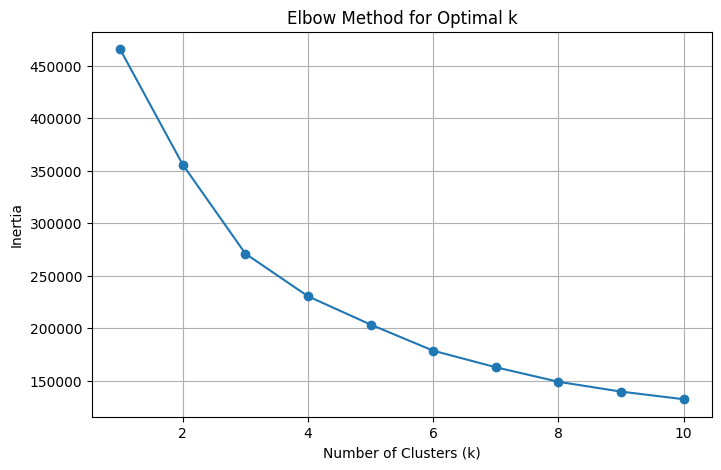

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(df[['review_score', 'sentiment_score', 'review_length', 'delivery_delay']])

# Elbow method to find optimal k
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


##  Step 5: KMeans Clustering with k=3

In [19]:
# Apply KMeans clustering with k = 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

# Quick summary
df.groupby('cluster').mean(numeric_only=True)


,review_score,sentiment_score,review_length,delivery_delay
cluster,,,,
0,2.753468,4.648505,20.816574,-6.975984
1,4.766747,4.809913,19.357535,-13.601123
2,4.394035,1.958008,43.547722,-13.001362


In [20]:
# Optional: map cluster numbers to labels
cluster_labels = {
    0: "Mixed Feedback",
    1: "Unclear / Low Score",
    2: "Happy"
}

df['cluster_label'] = df['cluster'].map(cluster_labels)


## Step 6: Visualize Clusters (PCA & t-SNE)

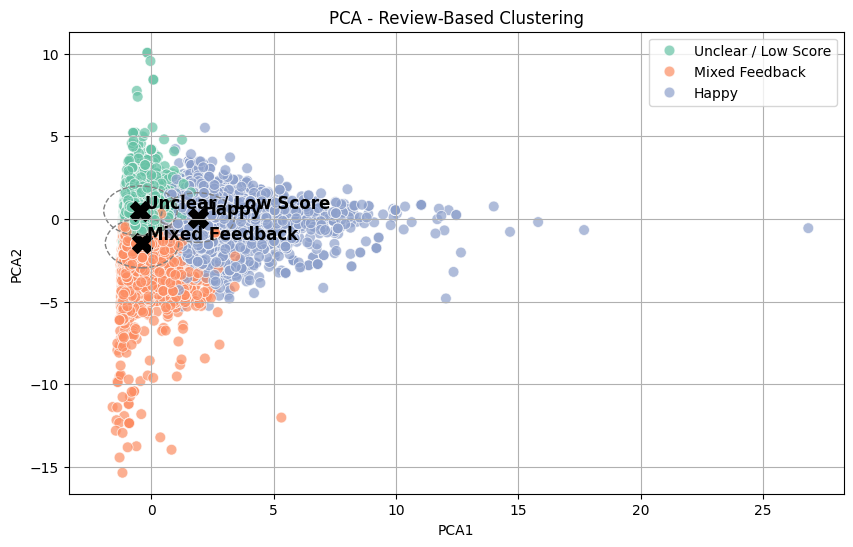

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Run PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

# Add to df for plotting
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Set up plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster_label', palette='Set2', s=60, alpha=0.7)

# Draw cluster centroids + circle around each
centroids = pd.DataFrame(pca.transform(kmeans.cluster_centers_), columns=['PCA1', 'PCA2'])
for i, row in centroids.iterrows():
    plt.scatter(row['PCA1'], row['PCA2'], marker='X', s=200, color='black')
    circle = plt.Circle((row['PCA1'], row['PCA2']), radius=1.5, color='gray', fill=False, linestyle='--')
    plt.gca().add_patch(circle)
    plt.text(row['PCA1']+0.2, row['PCA2']+0.2, cluster_labels[i], fontsize=12, fontweight='bold')

plt.title("PCA - Review-Based Clustering")
plt.legend()
plt.grid(True)
plt.show()


## Step 7: t-SNE Visualization with

In [22]:
pip install MulticoreTSNE


  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for MulticoreTSNE
  Running setup.py clean for MulticoreTSNE
Failed to build MulticoreTSNE
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (MulticoreTSNE)


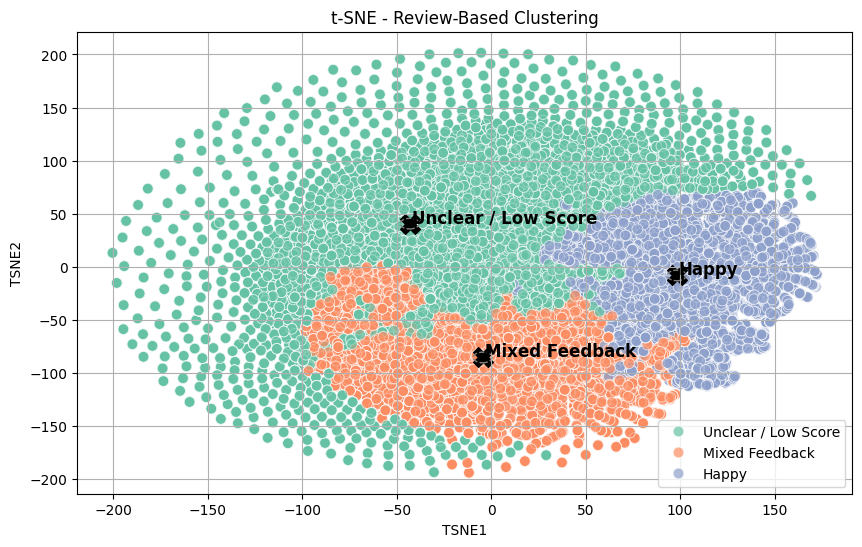

In [23]:
from sklearn.manifold import TSNE

# Run t-SNE
tsne = TSNE(n_components=2, perplexity=20, n_iter=1000, random_state=42)
tsne_components = tsne.fit_transform(X)

# Add t-SNE components to df
df['TSNE1'] = tsne_components[:, 0]
df['TSNE2'] = tsne_components[:, 1]

# Set up plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TSNE1', y='TSNE2', hue='cluster_label', palette='Set2', s=60, alpha=0.7)

# Optional: Use same KMeans centroids (transformed using PCA) to mark general centers
for i, label in enumerate(cluster_labels.values()):
    cluster_df = df[df['cluster'] == i]
    x_center = cluster_df['TSNE1'].mean()
    y_center = cluster_df['TSNE2'].mean()

    plt.scatter(x_center, y_center, marker='X', s=200, color='black')
    circle = plt.Circle((x_center, y_center), radius=5, color='gray', fill=False, linestyle='--')
    plt.gca().add_patch(circle)
    plt.text(x_center + 1, y_center + 1, label, fontsize=12, fontweight='bold')

plt.title("t-SNE - Review-Based Clustering")
plt.legend()
plt.grid(True)
plt.show()


## Project Summary: Review-Based Clustering (Sentiment + Score)

In [24]:
"""
In this analysis, we aimed to uncover patterns in customer satisfaction by
 clustering product reviews based on review scores, sentiment polarity, review
  length, and delivery delay. After performing text sentiment analysis and
   merging it with order metadata, we applied feature scaling and used the
    KMeans algorithm (k=3, business-driven) to identify distinct customer
     sentiment groups. The resulting clusters revealed Happy Customers,
      Mixed Feedback Customers, and a unique group with Low Review Scores
       but Positive Sentiment, suggesting potential review-score mismatches
        or hidden customer concerns. This segmentation helps businesses
         proactively respond to dissatisfaction, identify service mismatches,
          and improve post-purchase engagement.
"""

'\nIn this analysis, we aimed to uncover patterns in customer satisfaction by\n clustering product reviews based on review scores, sentiment polarity, review\n  length, and delivery delay. After performing text sentiment analysis and\n   merging it with order metadata, we applied feature scaling and used the\n    KMeans algorithm (k=3, business-driven) to identify distinct customer\n     sentiment groups. The resulting clusters revealed Happy Customers,\n      Mixed Feedback Customers, and a unique group with Low Review Scores\n       but Positive Sentiment, suggesting potential review-score mismatches\n        or hidden customer concerns. This segmentation helps businesses\n         proactively respond to dissatisfaction, identify service mismatches,\n          and improve post-purchase engagement.\n'

In [25]:
import pandas as pd

# --- Define the mapping from numerical cluster IDs to descriptive labels ---
# IMPORTANT: You need to verify these mappings based on your actual plot and
# which numerical cluster ID (from your clustering algorithm) corresponds
# to 'Happy', 'Unclear / Low Score', and 'Mixed Feedback' in your visualization.
# For example, if your clustering algorithm assigned ID 0 to the 'Unclear / Low Score' group,
# ID 1 to 'Happy', and ID 2 to 'Mixed Feedback'.
cluster_labels = {
    0: 'Unclear', # Example: Adjust this based on your actual cluster IDs
    1: 'Happy',               # Example: Adjust this based on your actual cluster IDs
    2: 'Mixed Feedback'       # Example: Adjust this based on your actual cluster IDs
}

# --- Create the 'review_category' column ---
# Assuming 'df' is your DataFrame and it already has a 'cluster' column
# (e.g., from KMeans or another clustering algorithm).

# First, ensure your 'cluster_label' column (used for plotting) is correctly set up.
# If you don't have it, create it using your 'cluster' column.
if 'cluster_label' not in df.columns:
    df['cluster_label'] = df['cluster'].map(cluster_labels)

# Now, create the 'review_category' column directly from 'cluster_label'
df['review_category'] = df['cluster_label']

# --- Display a sample of the updated DataFrame ---
print("DataFrame with the new 'review_category' column:")
# Displaying relevant columns to show the new category
print(df[['cluster', 'cluster_label', 'review_category', 'TSNE1', 'TSNE2']].head())

# --- Display value counts for the new column ---
print("\nValue counts for the 'review_category' column:")
print(df['review_category'].value_counts())

# You can now use 'df['review_category']' for further analysis or filtering.


DataFrame with the new 'review_category' column:
   cluster        cluster_label      review_category       TSNE1      TSNE2
0        1  Unclear / Low Score  Unclear / Low Score   -4.611775 -29.505341
1        1  Unclear / Low Score  Unclear / Low Score   -4.612001 -29.505394
2        1  Unclear / Low Score  Unclear / Low Score   -4.612001 -29.505394
3        1  Unclear / Low Score  Unclear / Low Score -103.415344 -84.532509
4        1  Unclear / Low Score  Unclear / Low Score -135.586212 -19.074551

Value counts for the 'review_category' column:
review_category
Unclear / Low Score    70147
Mixed Feedback         24942
Happy                  21290
Name: count, dtype: int64


In [26]:
df.head(1)

,customer_id_df1,review_score,sentiment_score,review_length,delivery_delay,cluster,cluster_label,PCA1,PCA2,TSNE1,TSNE2,review_category
0,9ef432eb6251297304e76186b10a928d,4.0,5,44,-8.0,1,Unclear / Low Score,0.191564,-0.48643,-4.611775,-29.505341,Unclear / Low Score


In [27]:
df1.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,product_id,seller_id,shipping_limit_date,price,freight_value,payment_type,payment_installments,payment_value,review_id,review_score,review,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,price_capped,review_score_capped,product_volume_cm3,price_log,total_sales,delivery_delay_days,order_year,order_month,order_day,order_date,order_weekday,is_weekend,order_item_count,avg_price_per_item
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:00,29.99,8.72,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,"Excellent quality t-shirts, they feel like the...",utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,9350.0,maua,SP,29.99,4.0,1976.0,3.44967,38.71,-8,2017,10,2,02-10-2017 10:56,0,0,3,9.996667
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:00,29.99,8.72,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,"Excellent quality t-shirts, they feel like the...",utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,9350.0,maua,SP,29.99,4.0,1976.0,3.44967,38.71,-8,2017,10,2,02-10-2017 10:56,0,0,3,9.996667


In [28]:
df2.head(2)

,review_id,order_id,review,bert_sentiment,confidence,sentiment,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay,sentiment_binary,sentiment_score,review_creation_date,review_length,clean_tokens
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,I had an order that was lost in transit. When ...,1 stars,0.463912,Negative,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,-16.0,0.0,1,1970-01-01 00:00:00.000043118,32,"['order', 'lost', 'transit', 'called', 'help',..."
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,I ordered the wrong size tee and had difficult...,5 stars,0.633963,Positive,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,-5.0,1.0,5,1970-01-01 00:00:00.000043169,40,"['ordered', 'wrong', 'size', 'tee', 'difficult..."


In [29]:
import pandas as pd

# Assuming 'df' is your DataFrame that you want to save.
# If you just ran the previous code, 'df' should be available.

# Define the filename for your CSV
output_filename = 'reviews_with_categories.csv'

# Save the DataFrame to a CSV file
# index=False prevents pandas from writing the DataFrame index as a column in the CSV
df.to_csv(output_filename, index=False)

print(f"DataFrame successfully saved to {output_filename}")
print(f"You can now download '{output_filename}' from your environment.")

# Optional: Display the first few rows of the saved CSV content (for verification)
# This part might not be directly runnable in all environments as it reads back the file,
# but it shows how you would verify the content.
try:
    with open(output_filename, 'r') as f:
        print("\nFirst 5 lines of the saved CSV file:")
        for i, line in enumerate(f):
            if i >= 5:
                break
            print(line.strip())
except FileNotFoundError:
    print(f"Error: Could not read back {output_filename} for verification.")



DataFrame successfully saved to reviews_with_categories.csv
You can now download 'reviews_with_categories.csv' from your environment.

First 5 lines of the saved CSV file:
customer_id_df1,review_score,sentiment_score,review_length,delivery_delay,cluster,cluster_label,PCA1,PCA2,TSNE1,TSNE2,review_category
9ef432eb6251297304e76186b10a928d,4.0,5,44,-8.0,1,Unclear / Low Score,0.19156427027931613,-0.48643006352991675,-4.6117754,-29.50534,Unclear / Low Score
9ef432eb6251297304e76186b10a928d,4.0,5,44,-8.0,1,Unclear / Low Score,0.19156427027931613,-0.48643006352991675,-4.612001,-29.505394,Unclear / Low Score
9ef432eb6251297304e76186b10a928d,4.0,5,44,-8.0,1,Unclear / Low Score,0.19156427027931613,-0.48643006352991675,-4.612001,-29.505394,Unclear / Low Score
a20e8105f23924cd00833fd87daa0831,4.0,5,15,-10.0,1,Unclear / Low Score,-0.7139714768447863,-0.31490694590568274,-103.415344,-84.53251,Unclear / Low Score
